In [1]:
import scanpy as sc
import pandas as pd
import anndata
import subprocess


In [2]:
full_adata= sc.read("data/IntegratedDataQCCheckpoints/integrated_normalized_control.h5ad")
full_adata
all_data = pd.read_csv("data/raw_data/Epithelial_Ctrl_metadata-2.csv")

all_data["Indexes"] = all_data.apply(lambda x: x["barcode_orig"].strip("_6"), axis = 1)
cell_type_dict = dict(zip(all_data["Indexes"], all_data["cell_type_fine"]))
full_adata.obs["cell_type_fine"] = pd.Series(cell_type_dict)

In [3]:
covid_colormap = {
 'AT1' :'#ff0000',
 'AT2' : '#4169e1',
 'DATP_long'  : '#ffff54',
 'DATP_short' : '#800080',
 'Tuft_montoro_long' : '#2e8b57',
 'Tuft_montoro_short' : '#0000ff',
 'UP_in_DATPs' : '#eee8aa',
 'our_DATP_sig': '#eee8aa',
 'basal_cell' : '#dda0dd',
 'ciliated_cell' : '#00ffff',
 'club_cell' : '#00fa9a',
 'cycling_AT2' : '#ff8c00',
 'ionocyte' :'#00ff00',
 'mucous_cell' : '#ff1493',
 'primed_AT2' : '#808000',
 'serous_cell' : '#a0522d',
 'tuft_cell' : '#696969',
 'neuroendocrine_cell' : "#00bfff",
 'goblet_cell' : '#ff00ff',


}

fine_colormap = {
 'AT1' :'#ff0000',
 'AT2' : '#4169e1',
 'AT2 (high MT)': '#ff8c00' ,
 'Airway basal': '#dda0dd',
 'Airway ciliated': '#00ffff',
 'Airway club': '#00fa9a',
 'Airway goblet': '#ff00ff',
 'NE' : "#00bfff",}

epi_colormap = {
  'AT1': '#ff0000',

 'AEC1':'#ff8c00',
 'AT2' : '#4169e1',
 'BASAL' : '#dda0dd',
 'CILIATED' :'#00ffff',
 'CLUB'  : '#00fa9a',
 'DATP'  : '#ffff54',
 'IONOCYTE': '#00ff00',
 'SEROUS': '#a0522d',
 'TUFT': '#696969',
 'NEUROENDOCRINE': "#00bfff",
 'PNECS':  '#808000',
 'GOBLET': '#ff00ff',
    'MUCOUS': '#ff1493',
}

laugh_colormap = {
 'AEC1_ME18p5_GENES_LG': '#ff0000',
 'AEC2_ME18p5_GENES_LG': '#ff8c00',
 'CILIATED_ME18p5_GENES_LG': '#00ffff',
 'CLUB_ME18p5_GENES_LG':  '#00fa9a' ,
 'LECTIN+KRT5+BASAL': '#dda0dd',
 'MUCINOUS': '#ff8c00',
 'PNECS': '#808000',}

singleR_colormap = {
 'Adipocytes':'#2f4f4f',
 'B-cells':'#006400',
 'CD4+ T-cells':'#8b0000',
 'CD8+ T-cells':'#000080',
 'Chondrocytes':'#ff8c00',
 'DC':'#ffff00',
 'Endothelial cells':'#deb887',
 'Eosinophils':'#00ff00',
 'Epithelial cells':'#00bfff',
 'Fibroblasts':'#0000ff',
 'Macrophages':'#ff00ff',
 'Monocytes':'#dda0dd',
 'NK cells':'#ff1493',
 'Smooth muscle':'#98fb98'
}


In [9]:
covid_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputcovid.csv")
laugh_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputlaughney.csv")
epi_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputepi.csv")

covid_full['label'] = covid_full.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
covid_full['label_score'] = covid_full.apply(lambda x: x[x["label"]], axis = 1)
laugh_full['label'] = laugh_full.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
laugh_full['label_score'] = laugh_full.apply(lambda x: x[x["label"]], axis = 1)
epi_full['label'] = epi_full.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
epi_full['label_score'] = epi_full.apply(lambda x: x[x["label"]], axis = 1)

full_adata.obs["cellAssign_covid_full"] = list(covid_full["label"])
full_adata.obs["cellAssign_laughney_full"] = list(laugh_full["label"])
full_adata.obs["cellAssign_epi_full"] = list(epi_full["label"])


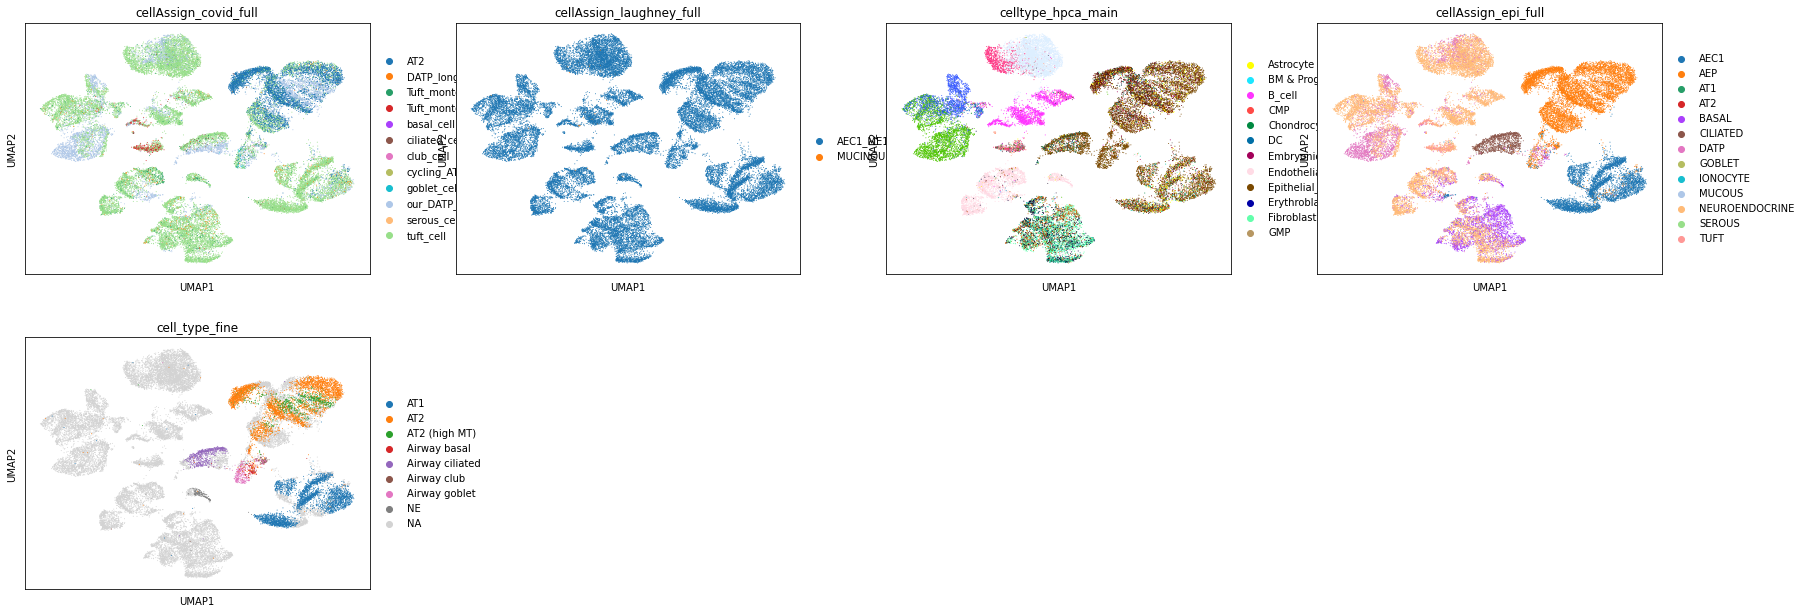

In [5]:
sc.pl.umap(full_adata,
           color=['cellAssign_covid_full', "cellAssign_laughney_full",'celltype_hpca_main', 
                  "cellAssign_epi_full", "cell_type_fine"])

In [6]:
covid_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputcovid.csv")
laugh_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputlaughney.csv")
epi_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputepi.csv")
covid_full['label'] = covid_full.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
covid_full['label_score'] = covid_full.apply(lambda x: x[x["label"]], axis = 1)
laugh_full['label'] = laugh_full.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
laugh_full['label_score'] = laugh_full.apply(lambda x: x[x["label"]], axis = 1)
epi_full['label'] = epi_full.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
epi_full['label_score'] = epi_full.apply(lambda x: x[x["label"]], axis = 1)



full_adata.obs["FullCellAssignCovid"] = list(covid_full["label"])
full_adata.obs["FullCellAssignLaughney"] = list(laugh_full["label"])
full_adata.obs["FullCellAssignEpithelial"] = list(epi_full["label"])


In [7]:
covid_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputcovid.csv")
laugh_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputlaughney.csv")
epi_full = pd.read_csv("data/IntegratedCellAssignResults/CellAssignOutputepi.csv")

covid_full.index = full_adata.obs.index 
laugh_full.index = full_adata.obs.index 
epi_full.index = full_adata.obs.index 
covid_full_adata = anndata.AnnData(X= covid_full,
                        obs= full_adata.obs)

laugh_full_adata = anndata.AnnData(X= laugh_full,
                        obs= full_adata.obs)

epi_full_adata = anndata.AnnData(X= epi_full,
                        obs= full_adata.obs)


/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/anndata/utils.py:143: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
/var/folders/qz/r00fl2ln2m92dv3sndtjfrl80000gn/T/ipykernel_23005/711495755.py:8: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  covid_full_adata = anndata.AnnData(X= covid_full,
/var/folders/qz/r00fl2ln2m92dv3sndtjfrl80000gn/T/ipykernel_23005/711495755.py:11: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  laugh_full_adata = anndata.AnnData(X= laugh_full,
/var/

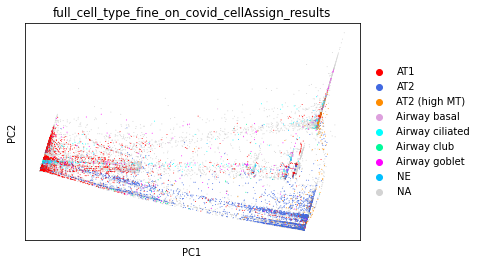

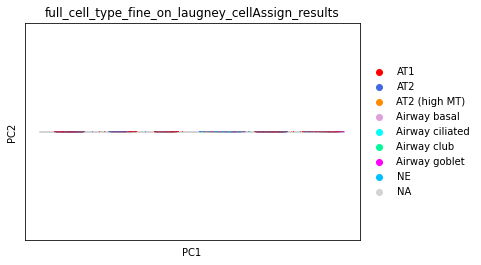

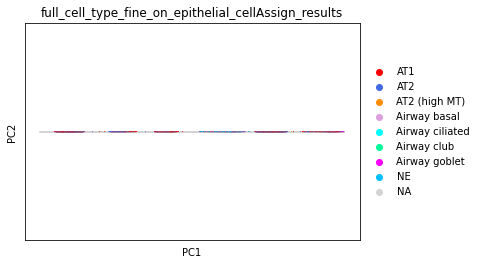

In [12]:
sc.tl.pca(covid_full_adata)
sc.tl.pca(laugh_full_adata)
sc.tl.pca(epi_full_adata)

pdf_merger = ['pdfunite']

covid_full_adata.obs["full_cell_type_fine_on_covid_cellAssign_results"] = covid_full_adata.obs["cell_type_fine"]
laugh_full_adata.obs["full_cell_type_fine_on_laugney_cellAssign_results"] = laugh_full_adata.obs["cell_type_fine"]
epi_full_adata.obs["full_cell_type_fine_on_epithelial_cellAssign_results"] = epi_full_adata.obs["cell_type_fine"]
    
sc.pl.pca(covid_full_adata, color='full_cell_type_fine_on_covid_cellAssign_results',
                         palette=fine_colormap,
         save='_on_full_cellassign_covid.pdf')

sc.pl.pca(laugh_full_adata, color='full_cell_type_fine_on_laugney_cellAssign_results',
                         palette=fine_colormap,
         save='_on_full_cellassign_laughney.pdf')

sc.pl.pca(epi_full_adata, color='full_cell_type_fine_on_epithelial_cellAssign_results',
                         palette=fine_colormap,
         save='_on_full_cellassign_epithelial.pdf')


pdf_merger.append('figures/pca_on_full_cellassign_covid.pdf')
pdf_merger.append('figures/pca_on_full_cellassign_laughney.pdf')
pdf_merger.append('figures/pca_on_full_cellassign_epithelial.pdf')


In [10]:
covid_full_adata.X
sc.pp.log1p(covid_full_adata)
sc.pp.scale(covid_full_adata, max_value=10)


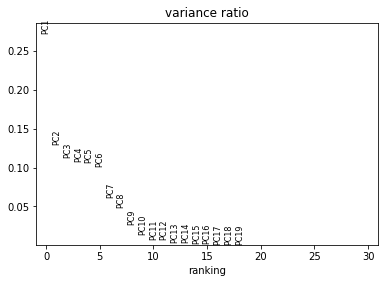

In [11]:
#sc.pp.log1p(covid_full_adata)

sc.tl.pca(covid_full_adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(covid_full_adata)


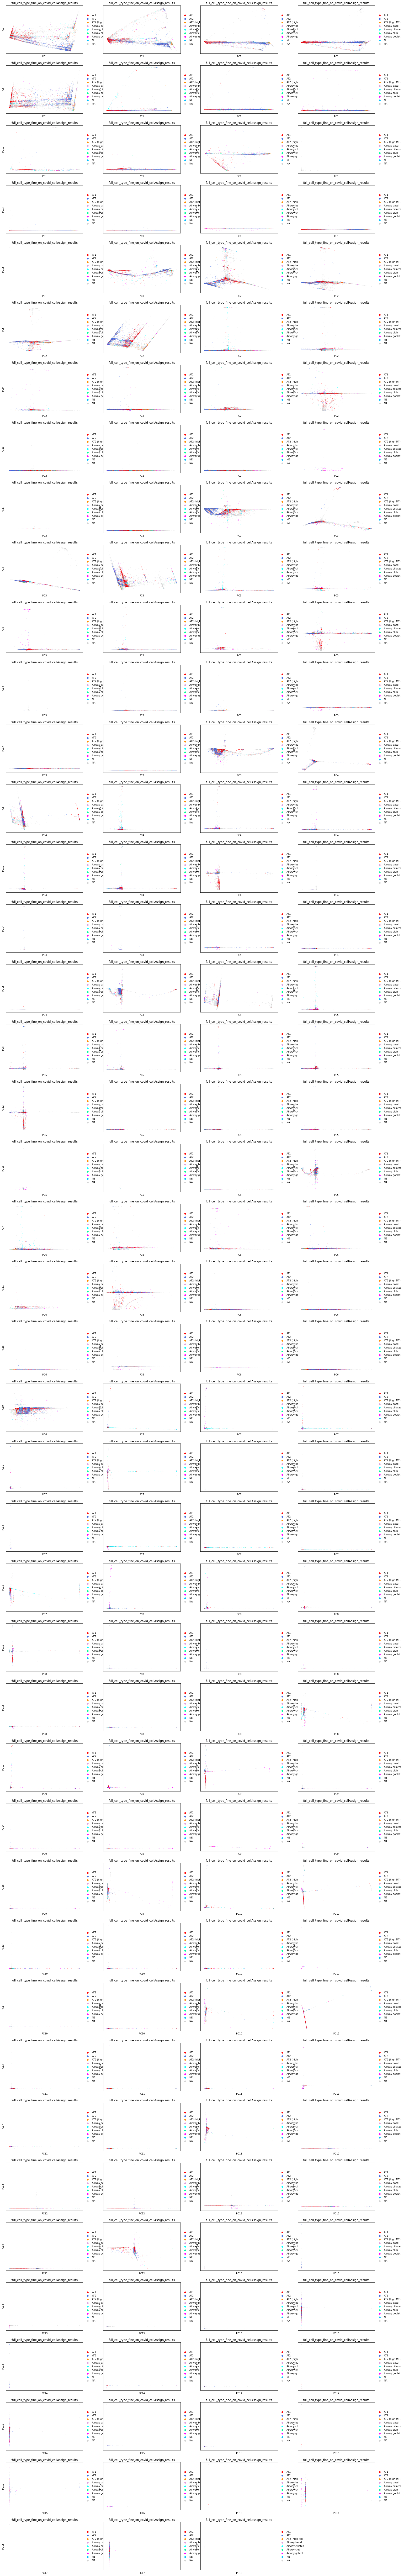

In [14]:
sc.pl.pca(covid_full_adata, components='all', color='full_cell_type_fine_on_covid_cellAssign_results',
                         palette=fine_colormap)

In [40]:
sc.tl.tsne(covid_full_adata)

/Users/kluthria/Projects/Summer22/summer_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


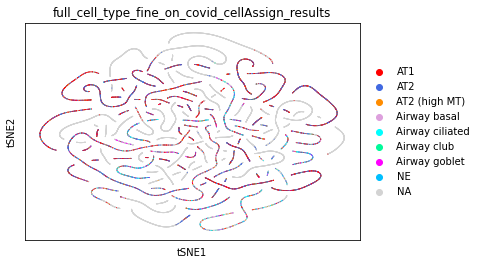

In [39]:
sc.pl.tsne(covid_full_adata, color='full_cell_type_fine_on_covid_cellAssign_results')

In [34]:
sc.pp.neighbors(covid_full_adata)
sc.tl.umap(covid_full_adata)


KeyboardInterrupt: 

In [ ]:
sc.pp.neighbors(laugh_full_adata)
sc.tl.umap(laugh_full_adata)


In [ ]:
sc.pp.neighbors(epi_full_adata)
sc.tl.umap(epi_full_adata)

In [ ]:
sc.pl.umap(covid_full_adata, color='full_cell_type_fine_on_covid_cellAssign_results',
                         palette=fine_colormap,
         save='_on_full_cellassign_covid.pdf')

sc.pl.umap(laugh_full_adata, color='full_cell_type_fine_on_laugney_cellAssign_results',
                         palette=fine_colormap,
         save='_on_full_cellassign_laughney.pdf')

sc.pl.umap(epi_full_adata, color='full_cell_type_fine_on_epithelial_cellAssign_results',
                         palette=fine_colormap,
         save='_on_full_cellassign_epithelial.pdf')


pdf_merger.append('figures/umap_on_full_cellassign_covid.pdf')
pdf_merger.append('figures/umap_on_full_cellassign_laughney.pdf')
pdf_merger.append('figures/umap_on_full_cellassign_epithelial.pdf')


pdf_merger.append("pdfcombinedfigures/FullIntegratedPCAUMAPOnCellAssignMatrix.pdf")
subprocess.call(pdf_merger)

### Epithelial Only

In [11]:

epi_only_adata = full_adata[full_adata.obs['cell_type_fine'].notnull(),:]

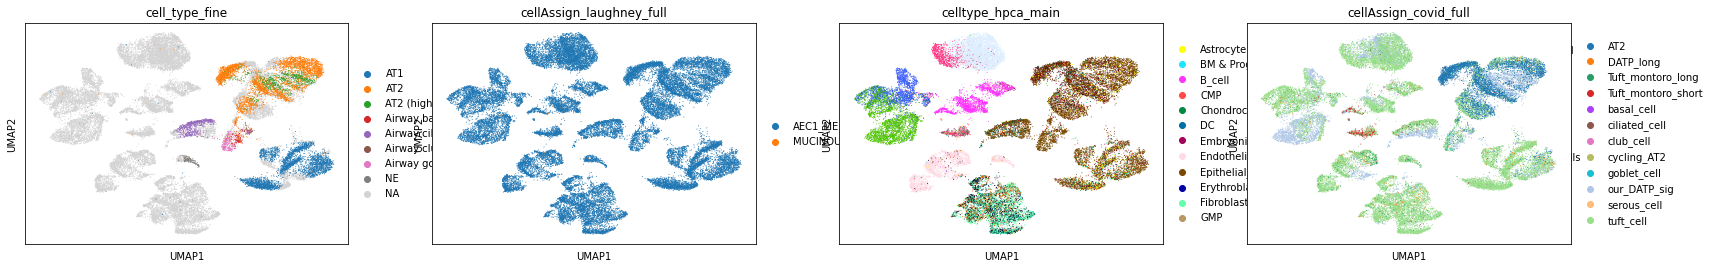

In [28]:
sc.pl.umap(full_adata,
           color=['cell_type_fine', "cellAssign_laughney_full",'celltype_hpca_main', "cellAssign_covid_full" ])
                  
                  

In [17]:


covid_epi = pd.read_csv("data/IntegratedCellAssignResults/EpiOnlyCellAssignOutputcovid.csv")
laugh_epi = pd.read_csv("data/IntegratedCellAssignResults/EpiOnlyCellAssignOutputlaughney.csv")
epi_epi = pd.read_csv("data/IntegratedCellAssignResults/EpiOnlyCellAssignOutputepi.csv")
covid_epi['label'] = covid_epi.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
covid_epi['label_score'] = covid_epi.apply(lambda x: x[x["label"]], axis = 1)
laugh_epi['label'] = laugh_epi.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
laugh_epi['label_score'] = laugh_epi.apply(lambda x: x[x["label"]], axis = 1)
epi_epi['label'] = epi_epi.drop(['Unnamed: 0'], axis=1).idxmax(axis=1)
epi_epi['label_score'] = epi_epi.apply(lambda x: x[x["label"]], axis = 1)



epi_only_adata.obs["EpithelialCellsCellAssignCovid"] = list(covid_epi["label"])
epi_only_adata.obs["EpithelialCellsCellAssignLaughney"] = list(laugh_epi["label"])
epi_only_adata.obs["EpithelialCellsCellAssignEpithelial"] = list(epi_epi["label"])


In [24]:
set(epi_only_adata.obs['EpithelialCellsCellAssignCovid'])

{'AT1',
 'AT2',
 'DATP_long',
 'DATP_short',
 'Tuft_montoro_long',
 'basal_cell',
 'ciliated_cell',
 'club_cell',
 'cycling_AT2',
 'goblet_cell',
 'mucous_cell',
 'our_DATP_sig',
 'serous_cell',
 'tuft_cell'}

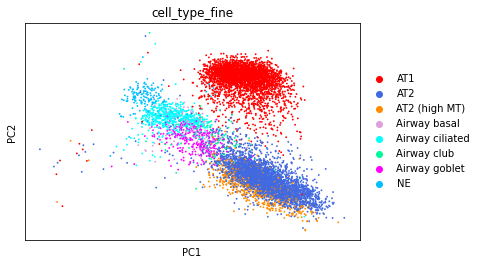

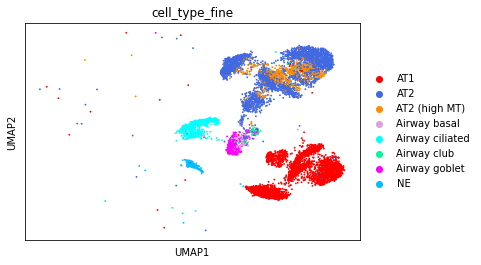

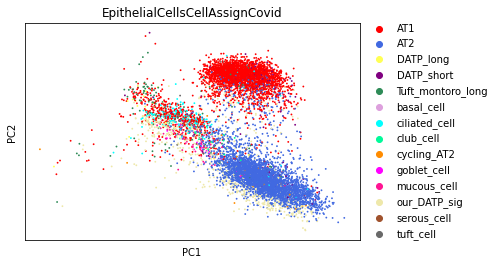

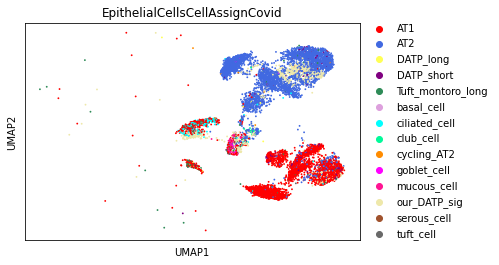

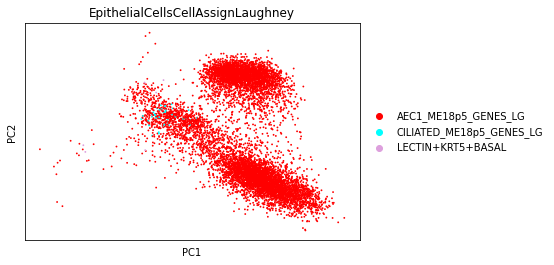

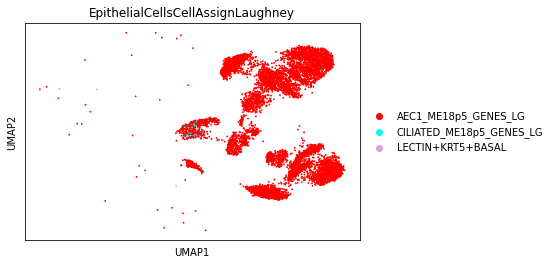

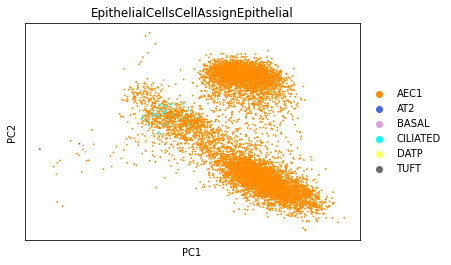

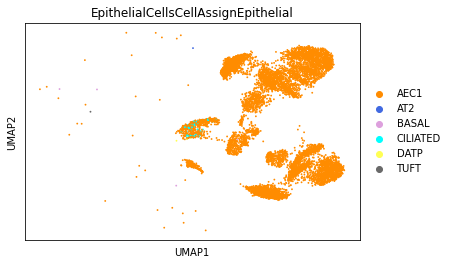

0

In [26]:
pdf_merger = ['pdfunite']

cols = ['cell_type_fine', "EpithelialCellsCellAssignCovid",
                  'EpithelialCellsCellAssignLaughney', 
                  'EpithelialCellsCellAssignEpithelial'
                 ]

colormaps = {
    'cell_type_fine':fine_colormap ,
    "EpithelialCellsCellAssignCovid": covid_colormap,
    'EpithelialCellsCellAssignLaughney': laugh_colormap, 
    'EpithelialCellsCellAssignEpithelial': epi_colormap 
}

for x in cols:
    figure =  sc.pl.pca(epi_only_adata, color=x,
                         palette=colormaps[x], 
                        save='integrated'+x+'.pdf')
    figure2 =  sc.pl.umap(epi_only_adata, color=x,
                         palette=colormaps[x], 
                        save='integrated'+x+'.pdf')
    pdf_merger.append('figures/pcaIntegrated'+x+'.pdf')
    pdf_merger.append('figures/umapIntegrated'+x+'.pdf')
    
pdf_merger.append("IntegratedCellAssignEpithelialCellsOnlyPCAUMAPPlots.pdf")
subprocess.call(pdf_merger)


In [8]:
covid_epi = pd.read_csv("data/IntegratedCellAssignResults/EpiOnlyCellAssignOutputcovid.csv",
                        index_col=0)
laugh_epi = pd.read_csv("data/IntegratedCellAssignResults/EpiOnlyCellAssignOutputlaughney.csv", 
                        index_col=0)
epi_epi = pd.read_csv("data/IntegratedCellAssignResults/EpiOnlyCellAssignOutputepi.csv",
                      index_col=0)

covid_epi.index = epi_only_adata.obs.index 
laugh_epi.index = epi_only_adata.obs.index 
epi_epi.index = epi_only_adata.obs.index 
covid_adata = anndata.AnnData(X= covid_epi,
                        obs= epi_only_adata.obs)

laugh_adata = anndata.AnnData(X= laugh_epi,
                        obs= epi_only_adata.obs)
epi_adata = anndata.AnnData(X= epi_epi,
                        obs= epi_only_adata.obs)


NameError: name 'epi_only_adata' is not defined

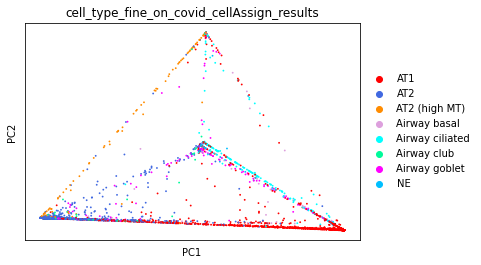

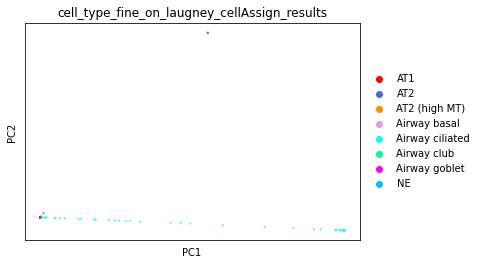

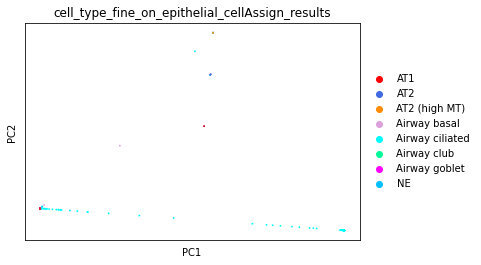

In [55]:
sc.tl.pca(covid_adata)
sc.tl.pca(laugh_adata)
sc.tl.pca(epi_adata)

pdf_merger = ['pdfunite']

covid_adata.obs["cell_type_fine_on_covid_cellAssign_results"] = covid_adata.obs["cell_type_fine"]
laugh_adata.obs["cell_type_fine_on_laugney_cellAssign_results"] = laugh_adata.obs["cell_type_fine"]
epi_adata.obs["cell_type_fine_on_epithelial_cellAssign_results"] = epi_adata.obs["cell_type_fine"]
    
sc.pl.pca(covid_adata, color='cell_type_fine_on_covid_cellAssign_results',
                         palette=fine_colormap,
         save='_on_cellassign_covid.pdf')

sc.pl.pca(laugh_adata, color='cell_type_fine_on_laugney_cellAssign_results',
                         palette=fine_colormap,
         save='_on_cellassign_laughney.pdf')

sc.pl.pca(epi_adata, color='cell_type_fine_on_epithelial_cellAssign_results',
                         palette=fine_colormap,
         save='_on_cellassign_epithelial.pdf')


pdf_merger.append('figures/pca_on_cellassign_covid.pdf')
pdf_merger.append('figures/pca_on_cellassign_laughney.pdf')
pdf_merger.append('figures/pca_on_cellassign_epithelial.pdf')


In [56]:
    
    
sc.pp.neighbors(covid_adata)
sc.tl.umap(covid_adata)
sc.pp.neighbors(laugh_adata)
sc.tl.umap(laugh_adata)
sc.pp.neighbors(epi_adata)
sc.tl.umap(epi_adata)

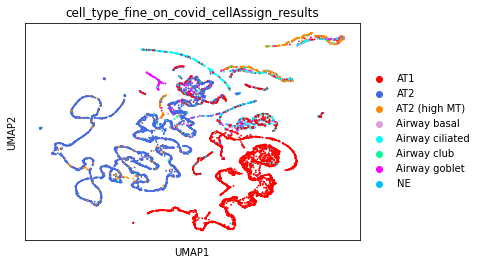

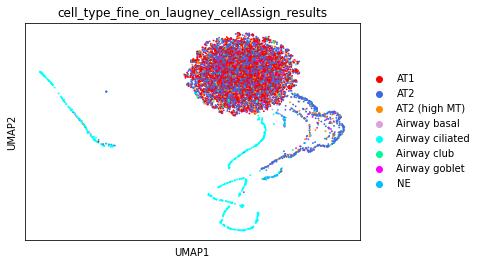

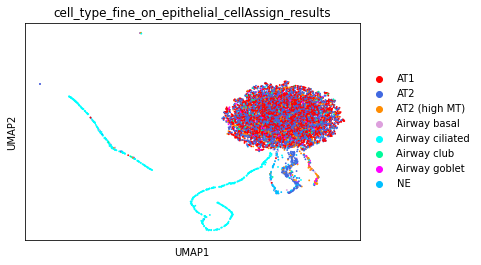

0

In [57]:
sc.pl.umap(covid_adata, color='cell_type_fine_on_covid_cellAssign_results',
                         palette=fine_colormap,
         save='_on_cellassign_covid.pdf')

sc.pl.umap(laugh_adata, color='cell_type_fine_on_laugney_cellAssign_results',
                         palette=fine_colormap,
         save='_on_cellassign_laughney.pdf')

sc.pl.umap(epi_adata, color='cell_type_fine_on_epithelial_cellAssign_results',
                         palette=fine_colormap,
         save='_on_cellassign_epithelial.pdf')


pdf_merger.append('figures/umap_on_cellassign_covid.pdf')
pdf_merger.append('figures/umap_on_cellassign_laughney.pdf')
pdf_merger.append('figures/umap_on_cellassign_epithelial.pdf')


pdf_merger.append("pdfcombinedfigures/EpithelialOnlyIntegratedPCAUMAPOnCellAssignMatrix.pdf")
subprocess.call(pdf_merger)